# __2. Credit Risk Modelling:__ Preprocessing and Feature Selection
## by: __Aprian Immanuel__ (087785160835 / immanuelaprian@gmail.com)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('precredit_train.csv', delimiter=';') #import dataset
df = df.drop(['NULL', 'MyUnknownColumn', 'LN_ID.1', 'MyUnknownColumn.1', 'SK_ID_PREV.1', 'LN_ID.2', 'CONTRACT_STATUS'], axis=1) #drop unnecessary feature
df = df.rename(columns={'CONTRACT_TYPE.1' : 'CONTRACT_TYPE_PREV_APP', 'ANNUITY.1' : 'ANNUITY_PREV_APP', 'PRICE.1':'PRICE_PREV_APP', 'WEEKDAYS_APPLY.1':'WEEKKDAYS_APPLY_PREV_APP', 'HOUR_APPLY.1': 'HOUR_APPLY_PREV_APP', 'APPROVED_CREDIT.1':'APPROVED_CREDIT_PREV_APP'}, inplace=False) #rename feature
df.head()

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,PRICE_PREV_APP,WEEKKDAYS_APPLY_PREV_APP,HOUR_APPLY_PREV_APP,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,145235,0,Cash loans,M,0,202500.0,728460.0,44694.0,675000.0,Commercial associate,...,62955.0,SUNDAY,11.0,-261.0,8.0,low_normal,365243.0,-231.0,-16.0,1.0
1,156401,0,Cash loans,F,1,225000.0,640080.0,31261.5,450000.0,Working,...,64039.5,FRIDAY,16.0,-978.0,4.0,middle,365243.0,-947.0,-850.0,0.0
2,169487,0,Cash loans,M,0,202500.0,360000.0,NaN,360000.0,Working,...,270000.0,SATURDAY,10.0,-378.0,0.0,NA1,-365.0,-335.0,365243.0,0.0
3,230261,0,Cash loans,F,0,94500.0,148365.0,10453.5,135000.0,Working,...,41625.0,SATURDAY,11.0,-496.0,6.0,middle,365243.0,-465.0,-313.0,0.0
4,272288,0,Cash loans,F,0,157500.0,281493.0,10561.5,243000.0,Pensioner,...,1174500.0,WEDNESDAY,14.0,-449.0,54.0,low_normal,365243.0,-419.0,365243.0,1.0


In [3]:
df.columns

Index(['LN_ID', 'TARGET', 'CONTRACT_TYPE', 'GENDER', 'NUM_CHILDREN', 'INCOME',
       'APPROVED_CREDIT', 'ANNUITY', 'PRICE', 'INCOME_TYPE', 'EDUCATION',
       'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE', 'DAYS_WORK',
       'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY', 'HOUR_APPLY',
       'ORGANIZATION_TYPE', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3',
       'SK_ID_PREV', 'INST_NUMBER', 'INST_DAYS', 'PAY_DAYS', 'AMT_INST',
       'AMT_PAY', 'CONTRACT_TYPE_PREV_APP', 'ANNUITY_PREV_APP', 'APPLICATION',
       'APPROVED_CREDIT_PREV_APP', 'AMT_DOWN_PAYMENT', 'PRICE_PREV_APP',
       'WEEKKDAYS_APPLY_PREV_APP', 'HOUR_APPLY_PREV_APP', 'DAYS_DECISION',
       'TERM_PAYMENT', 'YIELD_GROUP', 'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## __1. Value Encoding:__ This step is for preparing the dataset to be ready feature selected and modelled
### a. INCOME TYPE

In [4]:
df_new = df.copy()
df_new = df_new.dropna(axis=0)
incometype_dict = {'Working': 1, 'Commercial associate': 2, 'Pensioner': 3, 'State servant': 4, 'Unemployed':5}
df_new['income_type_ord'] = df['INCOME_TYPE'].map(incometype_dict)
df_new[['income_type_ord', 'INCOME_TYPE']].head(3)

,income_type_ord,INCOME_TYPE
0,2.0,Commercial associate
1,1.0,Working
10,2.0,Commercial associate


### b.GENDER

In [5]:
gender_dict = {'M': 1, 'F': 2, }
df_new['gender_ord'] = df['GENDER'].map(gender_dict)
df_new[['gender_ord', 'GENDER']].head(3)

,gender_ord,GENDER
0,1,M
1,2,F
10,2,F


### C. Education Background

In [6]:
education_dict = {'Secondary / secondary special': 1, 'Higher education': 2, 'Incomplete higher': 3, 'Lower secondary': 4, 'Academic degree': 5}
df_new['education_ord'] = df['EDUCATION'].map(education_dict)
df_new[['education_ord', 'EDUCATION']].head(3)

,education_ord,EDUCATION
0,1,Secondary / secondary special
1,1,Secondary / secondary special
10,2,Higher education


### d. Family Status

In [7]:
family_dict = {'Married': 1, 'Single / not married': 2, 'Civil marriage': 3, 'Separated': 4, 'Widow': 5}
df_new['family_status_ord'] = df['FAMILY_STATUS'].map(family_dict)
df_new[['family_status_ord', 'FAMILY_STATUS']].head(3)

,family_status_ord,FAMILY_STATUS
0,1,Married
1,1,Married
10,1,Married


### e. Num of Children

In [8]:
children_dict = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 8: 7}
df_new['num_of_children_ord'] = df['NUM_CHILDREN'].map(children_dict)
df_new[['num_of_children_ord', 'NUM_CHILDREN']].head(3)

,num_of_children_ord,NUM_CHILDREN
0,1.0,0
1,2.0,1
10,2.0,1


### f. Housing Types

In [9]:
housing_dict = {'House / apartment': 1, 'With parents': 2, 'Municipal apartment': 3, 'Rented apartment': 4, 'Office apartment': 5, 'Co-op apartment': 6}
df_new['housing_type_ord'] = df['HOUSING_TYPE'].map(housing_dict)
df_new[['housing_type_ord', 'HOUSING_TYPE']].head(3)

,housing_type_ord,HOUSING_TYPE
0,1,House / apartment
1,1,House / apartment
10,1,House / apartment


In [10]:
contract_type_dict = {'Cash loans': 1, 'Revolving loans': 2}
df_new['contract_type_ord'] = df['CONTRACT_TYPE'].map(contract_type_dict)
df_new[['contract_type_ord', 'CONTRACT_TYPE']].head(3)

,contract_type_ord,CONTRACT_TYPE
0,1,Cash loans
1,1,Cash loans
10,1,Cash loans


### g. Weekdays Apply

In [11]:
weekdays_apply_dict = {'MONDAY': 1, 'TUESDAY': 2, 'WEDNESDAY': 3, 'THURSDAY': 4, 'FRIDAY': 5, 'SATURDAY': 6, 'SUNDAY': 7}
df_new['weekdays_apply_ord'] = df['WEEKDAYS_APPLY'].map(weekdays_apply_dict)
df_new[['weekdays_apply_ord', 'WEEKDAYS_APPLY']].head(3)

,weekdays_apply_ord,WEEKDAYS_APPLY
0,2,TUESDAY
1,3,WEDNESDAY
10,3,WEDNESDAY


### h. Hour Apply

In [12]:
df_new['hour_apply_ord'] = pd.factorize(df_new['HOUR_APPLY'])[0].reshape(-1,1)
df_new[['hour_apply_ord', 'HOUR_APPLY']].sort_values(by='hour_apply_ord').head(10)

,hour_apply_ord,HOUR_APPLY
0,0,12
42740,0,12
42726,0,12
42717,0,12
42698,0,12
42675,0,12
42661,0,12
42622,0,12
42539,0,12
42494,0,12


### i. Organization Type 

In [13]:
df_new['organization_type_ord'] = pd.factorize(df_new['ORGANIZATION_TYPE'])[0].reshape(-1,1)
df_new[['organization_type_ord', 'ORGANIZATION_TYPE']].sort_values(by='organization_type_ord').head(10)

,organization_type_ord,ORGANIZATION_TYPE
0,0,Police
59142,0,Police
48174,0,Police
47819,0,Police
47042,0,Police
46744,0,Police
59562,0,Police
6499,0,Police
46586,0,Police
46516,0,Police


### j. Contract Type in Previous Application

In [14]:
contract_type_prevapp_dict = {'Cash loans': 1, 'Revolving loans': 2, 'Consumer loans': 3}
df_new['contract_type_prevapp_ord'] = df['CONTRACT_TYPE_PREV_APP'].map(contract_type_prevapp_dict)
df_new[['contract_type_prevapp_ord', 'CONTRACT_TYPE_PREV_APP']].head(3)

,contract_type_prevapp_ord,CONTRACT_TYPE_PREV_APP
0,3.0,Consumer loans
1,3.0,Consumer loans
10,3.0,Consumer loans


### k. Weekdays Apply in Previous Application

In [15]:
weekdays_apply_dict = {'MONDAY': 1, 'TUESDAY': 2, 'WEDNESDAY': 3, 'THURSDAY': 4, 'FRIDAY': 5, 'SATURDAY': 6, 'SUNDAY': 7}
df_new['weekdays_apply_prevapp_ord'] = df['WEEKKDAYS_APPLY_PREV_APP'].map(weekdays_apply_dict)
df_new[['weekdays_apply_prevapp_ord', 'WEEKKDAYS_APPLY_PREV_APP']].head(3)

,weekdays_apply_prevapp_ord,WEEKKDAYS_APPLY_PREV_APP
0,7.0,SUNDAY
1,5.0,FRIDAY
10,6.0,SATURDAY


### l. Term of Payment 

In [16]:
df_new['term_payment_ord'] = pd.factorize(df_new['TERM_PAYMENT'])[0].reshape(-1,1)
df_new[['term_payment_ord', 'TERM_PAYMENT']].sort_values(by='term_payment_ord').head(10)

,term_payment_ord,TERM_PAYMENT
0,0,8.0
43457,0,8.0
2989,0,8.0
59478,0,8.0
51963,0,8.0
51988,0,8.0
51990,0,8.0
51896,0,8.0
43250,0,8.0
43165,0,8.0


### m. Grouped Interest Rate into Small, Medium and High of the Previous Application

In [17]:
yield_group_dict = {'middle': 1, 'high': 2, 'low_normal': 3, 'low_action': 4, 'NA1': 5}
df_new['yield_group_ord'] = df['YIELD_GROUP'].map(yield_group_dict)
df_new[['yield_group_ord', 'YIELD_GROUP']].head(3)

,yield_group_ord,YIELD_GROUP
0,3.0,low_normal
1,1.0,middle
10,2.0,high


### n. Approximately at what hour did the client apply for the previous loan - Hour Apply in Previous Application

In [18]:
df_new['hour_apply_prevapp_ord'] = pd.factorize(df_new['HOUR_APPLY_PREV_APP'])[0].reshape(-1,1)
df_new[['hour_apply_prevapp_ord', 'HOUR_APPLY_PREV_APP']].sort_values(by='hour_apply_prevapp_ord').head(10)

,hour_apply_prevapp_ord,HOUR_APPLY_PREV_APP
0,0,11.0
47042,0,11.0
47021,0,11.0
3405,0,11.0
46939,0,11.0
46912,0,11.0
46901,0,11.0
46881,0,11.0
46880,0,11.0
46865,0,11.0


In [22]:
## putting all feature ordinal and all of the previous feature needed into new dataframe
df_new_test_train = df_new[['LN_ID', 'TARGET','contract_type_ord','gender_ord', 'num_of_children_ord',        'INCOME','APPROVED_CREDIT', 'ANNUITY', 'PRICE', 'income_type_ord', 'education_ord',
       'family_status_ord', 'housing_type_ord', 'DAYS_AGE', 'DAYS_WORK',
       'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'weekdays_apply_ord', 'HOUR_APPLY',
       'organization_type_ord', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3',
       'SK_ID_PREV', 'INST_NUMBER', 'INST_DAYS', 'PAY_DAYS', 'AMT_INST',
       'AMT_PAY', 'contract_type_prevapp_ord', 'ANNUITY_PREV_APP', 'APPLICATION',
       'APPROVED_CREDIT_PREV_APP', 'AMT_DOWN_PAYMENT', 'PRICE_PREV_APP',
       'weekdays_apply_prevapp_ord', 'hour_apply_prevapp_ord', 'DAYS_DECISION',
       'term_payment_ord', 'yield_group_ord', 'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL']]
df_new_test_train = df_new_test_train.dropna(axis=0)
df_new_test_train.head()

,LN_ID,TARGET,contract_type_ord,gender_ord,num_of_children_ord,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,income_type_ord,...,PRICE_PREV_APP,weekdays_apply_prevapp_ord,hour_apply_prevapp_ord,DAYS_DECISION,term_payment_ord,yield_group_ord,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,145235,0,1,1,1.0,202500.0,728460.0,44694.0,675000.0,2.0,...,62955.0,7.0,0,-261.0,0,3.0,365243.0,-231.0,-16.0,1.0
1,156401,0,1,2,2.0,225000.0,640080.0,31261.5,450000.0,1.0,...,64039.5,5.0,1,-978.0,1,1.0,365243.0,-947.0,-850.0,0.0
10,186361,0,1,2,2.0,270000.0,906615.0,30091.5,688500.0,2.0,...,34353.0,6.0,2,-1964.0,2,2.0,365243.0,-1929.0,-1774.0,0.0
14,255272,0,1,1,1.0,247500.0,622413.0,33894.0,495000.0,1.0,...,91791.0,6.0,3,-463.0,3,1.0,365243.0,-432.0,365243.0,0.0
16,123747,1,1,2,1.0,112500.0,720000.0,25506.0,720000.0,1.0,...,57919.5,6.0,4,-536.0,4,4.0,365243.0,-505.0,365243.0,0.0


In [23]:
# df_new_test_train.to_csv('Encoded_Modelling_Risk_Dataset.csv')

## __2. Feature Selection:__ Correlation Analysis, Random Forrest, and SelectKBest (f_classif)

In [24]:
#feature selection using SelectKBest
x = df_new_test_train[['LN_ID', 'contract_type_ord','gender_ord', 'num_of_children_ord',                      'INCOME','APPROVED_CREDIT', 'ANNUITY', 'PRICE', 'income_type_ord', 'education_ord',
       'family_status_ord', 'housing_type_ord', 'DAYS_AGE', 'DAYS_WORK',
       'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'weekdays_apply_ord', 'HOUR_APPLY',
       'organization_type_ord', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3',
       'SK_ID_PREV', 'INST_NUMBER', 'INST_DAYS', 'PAY_DAYS', 'AMT_INST',
       'AMT_PAY', 'contract_type_prevapp_ord', 'ANNUITY_PREV_APP', 'APPLICATION',
       'APPROVED_CREDIT_PREV_APP', 'AMT_DOWN_PAYMENT', 'PRICE_PREV_APP',
       'weekdays_apply_prevapp_ord', 'hour_apply_prevapp_ord', 'DAYS_DECISION',
       'term_payment_ord', 'yield_group_ord', 'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL']]
y = df_new_test_train['TARGET']  

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))  

Specs       Score
19      EXT_SCORE_1  311.627961
21      EXT_SCORE_3  243.185441
12         DAYS_AGE   88.463563
8   income_type_ord   32.061819
15   DAYS_ID_CHANGE   24.892573
7             PRICE   18.723380
13        DAYS_WORK   17.923287
24        INST_DAYS   17.544501
25         PAY_DAYS   17.273581
40        FIRST_DUE   16.443101


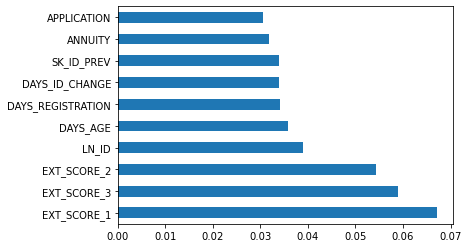

In [25]:
rf_model = RandomForestClassifier()
rf_model.fit(x,y)
feat_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
df_imp_feat = feat_importances.nlargest(10)
# feat_importances.nlargest(10).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()

## Note: 
### 1. A random forest is made from multiple decision trees (as given by n_estimators). Each tree individually predicts for the new data and random forest spits out the mean prediction from those trees. The idea for confidence level of predictions is just to see how much predictions coming from different trees are varying for the new observations. Then to analyze further, we can seek some pattern for observations which have highest variability of predictions.
### 2. In most of the cases, random forests can beat linear models for prediction. An objection frequently raised for random forests is interpretation of results as compared to linear models. But one can address the misconceived objection using the discussed methodologies of interpretation.
### 3. Feature selection is also known as attribute selection is a process of extracting the most relevant features from the dataset and then applying machine learning algorithms for the better performance of the model. A large number of irrelevant features increases the training time exponentially and increase the risk of overfitting.
### 4. Chi-square Test for Feature Extraction:
Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with best Chi-square scores. It determines if the association between two categorical variables of the sample would reflect their real association in the population.
### 5. ANOVA f-test Feature Selection, ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not. An F-statistic, or F-test, is a class of statistical tests that calculate the ratio between variances values, such as the variance from two different samples or the explained and unexplained variance by a statistical test, like ANOVA. The ANOVA method is a type of F-statistic referred to here as an ANOVA f-test. Importantly, ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task.

## From the feature selection, we understand that;
### 'EXT_SCORE_1 is the most important feature in this credit risk modelling as followed by 'EXT_SCORE_3' and 'EXT_SCORE_2'

<hr>